In [2]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['font.size'] = 10

In [16]:
df = pd.read_csv('results_1.csv')

In [5]:
df.dtypes

model_name               object
data_name                object
Input type               object
is_apply_multi_label    float64
transfer_task            object
source_train-Loss        object
source_train-Acc        float64
source_val-Loss         float64
source_val-Acc          float64
target_val-Loss         float64
target_val-Acc          float64
dtype: object

In [6]:
df.head()

,model_name,data_name,Input type,is_apply_multi_label,transfer_task,source_train-Loss,source_train-Acc,source_val-Loss,source_val-Acc,target_val-Loss,target_val-Acc
0,resnet_features_1d,CWRU,TimeSeries,0.0,"[[0], [1]]",0.7086,1.0,0.0005,1.0,0.0002,1.0000
1,resnet_features_1d,CWRU,TimeSeries,0.0,"[[0], [2]]",0.707,1.0,0.0002,1.0,0.0033,1.0000
2,resnet_features_1d,CWRU,TimeSeries,0.0,"[[0], [3]]",0.7036,1.0,0.0003,1.0,0.0437,0.9871
3,resnet_features_1d,CWRU,TimeSeries,0.0,"[[1], [0]]",0.6941,1.0,0.0005,1.0,0.0272,0.9962
4,resnet_features_1d,CWRU,TimeSeries,0.0,"[[1], [2]]",0.6941,1.0,0.0001,1.0,0.0001,1.0000


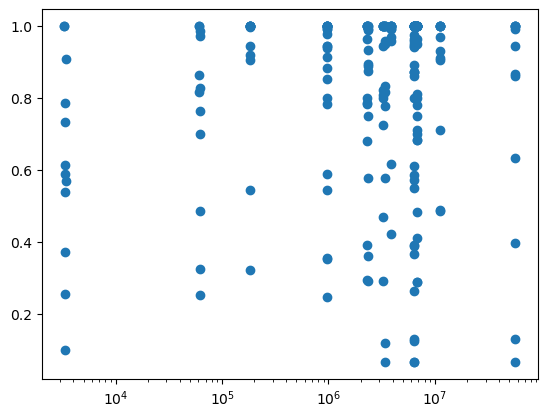

In [5]:
plt.scatter(df['Model Parameters'], df['Test Accuracy'])
plt.xscale('log')

In [7]:
df_agg = df.groupby(['Model', 'Model dim']).agg({
    'Model Parameters': 'mean',
    'Test Accuracy': ['mean', 'std']
})
# 合并多层索引的列名
df_agg.columns = [' '.join(col).strip() for col in df_agg.columns.values]

# 重置索引
df_agg = df_agg.reset_index()

df_agg.sort_values('Test Accuracy mean', ascending=False, inplace=True)
df_agg['model_name'] = df_agg['Model'] + df_agg['Model dim'].str.split(" ", expand=True).iloc[:, 0]
df_agg.to_csv("df_agg.csv", index=False)

/tmp/ipykernel_907967/2617040453.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([i for _ in data], data, c=colors[i], label='fault diagnosis example' if i == 0 else "")


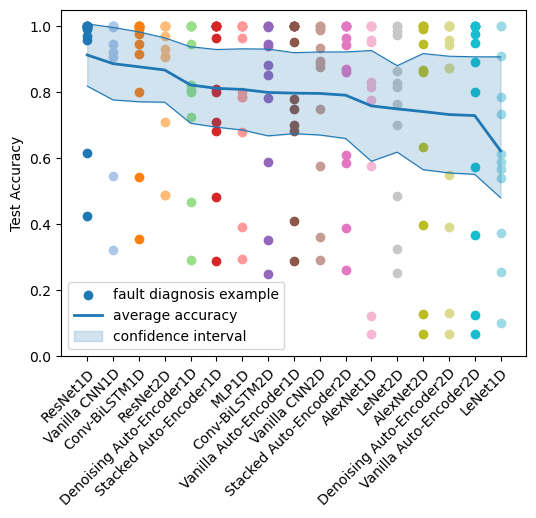

In [37]:
x = df_agg.loc[:, 'model_name']
y = df_agg.loc[:, 'Test Accuracy mean']
y_err = df_agg.loc[:, 'Test Accuracy std'] / 2.0

x_new = range(len(x))
y_new = y
y_upbound = y+y_err
y_upbound.iloc[-1] = y_upbound.iloc[-2]
y_lowbound = y-y_err

# 创建一个颜色映射
cmap = plt.cm.tab20

# 生成20个不同的颜色
colors = cmap(np.linspace(0, 1, len(df_agg)))

fig, ax = plt.subplots(figsize=(6, 4.5)) # 单栏版面宽度6英尺
# ax.grid(True)

for i, (index,row) in enumerate(df_agg.iterrows()):
    data = df.loc[(df['Model']==row['Model']) & (df['Model dim']==row['Model dim']), 'Test Accuracy'].values
    ax.scatter([i for _ in data], data, c=colors[i], label='fault diagnosis example' if i == 0 else "")

ax.plot(x_new, y_new, c='C0', label='average accuracy', lw=2)
ax.plot(x_new, y_upbound, c='C0', lw=0.8)
ax.plot(x_new, y_lowbound, c='C0', lw=0.8)

ax.set_ylim(0,1.05)
ax.set_xlim(-1,17)
ax.set_ylabel("Test Accuracy")
ax.fill_between(x_new, y_lowbound, y_upbound, alpha=0.2, color="C0", label='confidence interval')
ax.legend()
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x.values, rotation=45, ha='right', va='top', rotation_mode='anchor')
# plt.tight_layout()
plt.savefig('pic/average_accuracy.svg', bbox_inches='tight')


In [255]:
df_agg.sort_values('Model Parameters mean', inplace=True)
df_agg

,Model,Model dim,Model Parameters mean,Test Accuracy mean,Test Accuracy std,model_name
6,LeNet,1D architecture,3.334167e+03,0.621900,0.284153,LeNet1D
7,LeNet,2D architecture,6.133733e+04,0.748950,0.261873,LeNet2D
15,Vanilla CNN,1D architecture,1.813602e+05,0.886133,0.219661,Vanilla CNN1D
2,Conv-BiLSTM,1D architecture,9.700962e+05,0.876575,0.211765,Conv-BiLSTM1D
3,Conv-BiLSTM,2D architecture,9.732642e+05,0.798833,0.262948,Conv-BiLSTM2D
8,MLP,1D architecture,2.278576e+06,0.808083,0.245838,MLP1D
16,Vanilla CNN,2D architecture,2.327739e+06,0.795800,0.251584,Vanilla CNN2D
4,Denoising Auto-Encoder,1D architecture,3.258448e+06,0.821442,0.231813,Denoising Auto-Encoder1D
0,AlexNet,1D architecture,3.405296e+06,0.758158,0.335544,AlexNet1D
9,ResNet,1D architecture,3.846811e+06,0.912367,0.188465,ResNet1D


/tmp/ipykernel_676090/3827739782.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([row['Model Parameters mean'] for _ in data], data, c=colors[i], label='fault diagnosis example' if i == 0 else "")


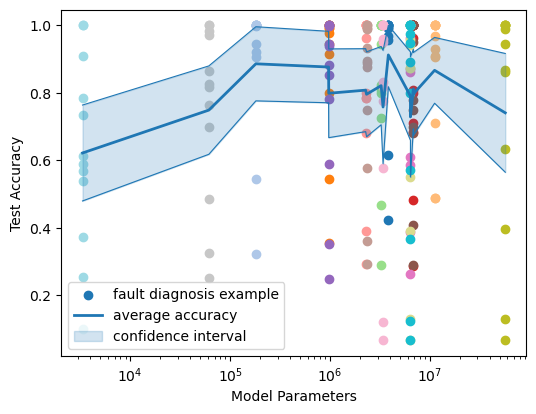

In [260]:
x = df_agg.loc[:, "Model Parameters mean"].values
y = df_agg.loc[:, "Test Accuracy mean"].values
y_err = df_agg.loc[:, "Test Accuracy std"].values / 2.0

y_upperbound = y + y_err
y_lowerbound = y - y_err

y_upperbound[y_upperbound > 1.0] = 1.0

# 创建一个颜色映射
cmap = plt.cm.tab20
# 生成20个不同的颜色
colors = cmap(np.linspace(0, 1, len(df_agg)))
# 与前面的图保持颜色顺序一致
df_agg.sort_values('Test Accuracy mean', ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(6, 4.5))
for i, (index,row) in enumerate(df_agg.iterrows()):
    data = df.loc[(df['Model']==row['Model']) & (df['Model dim']==row['Model dim']), 'Test Accuracy'].values
    ax.scatter([row['Model Parameters mean'] for _ in data], data, c=colors[i], label='fault diagnosis example' if i == 0 else "")
ax.plot(x, y, c='C0', label='average accuracy', lw=2)
ax.plot(x, y_upperbound, c='C0', lw=0.8)
ax.plot(x, y_lowerbound, c='C0', lw=0.8)
ax.fill_between(x, y_lowerbound, y_upperbound, alpha=0.2, color="C0", label='confidence interval')
ax.set_xscale('log')
ax.set_xlabel("Model Parameters")
ax.set_ylabel("Test Accuracy")
ax.legend()
plt.savefig('pic/model_parameters.svg', bbox_inches='tight')


In [ ]:
df = pd.read_csv("results_1.csv")

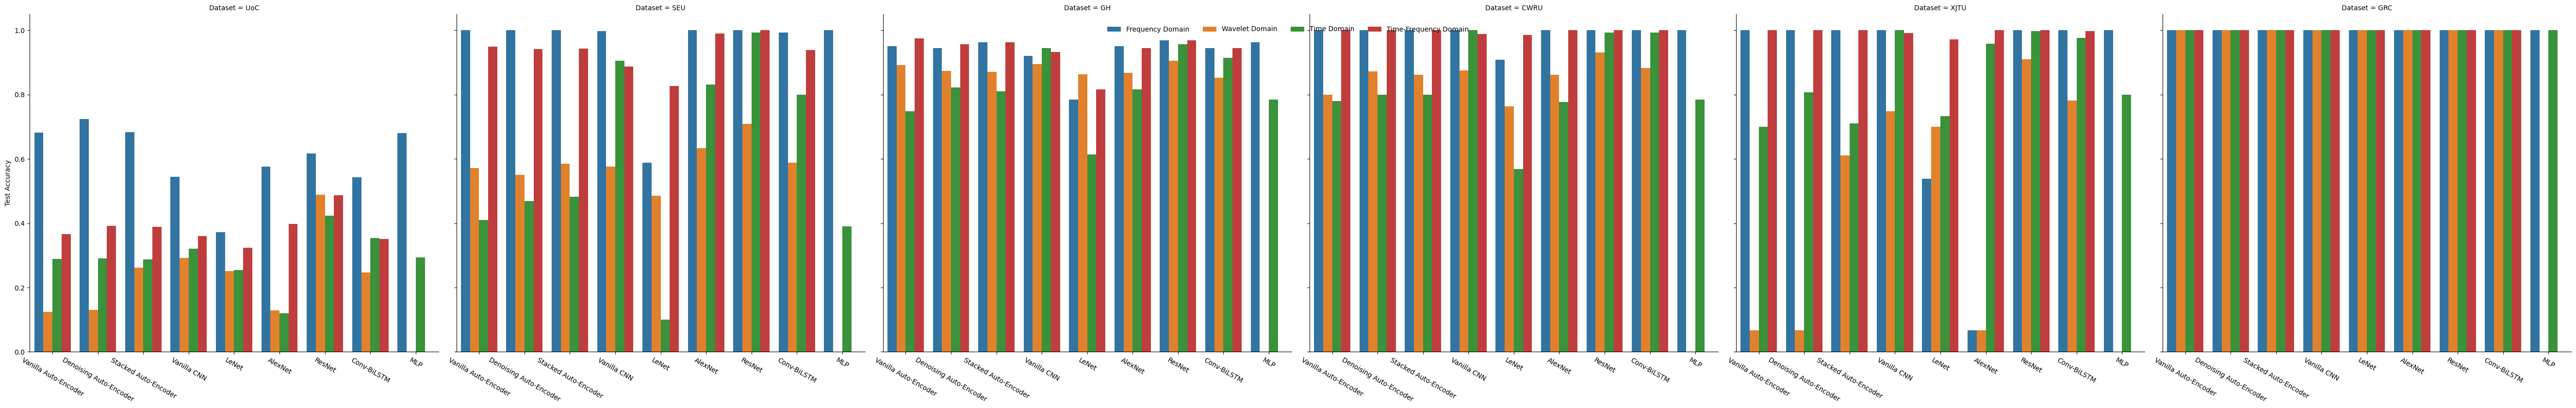

In [309]:
catplot = sns.catplot(x='Model', y='Test Accuracy', 
            hue="Input type", 
            col="Dataset", 
            order=["Vanilla Auto-Encoder", 
                    "Denoising Auto-Encoder",
                    "Stacked Auto-Encoder",
                    "Vanilla CNN",
                    "LeNet",
                    "AlexNet",
                    "ResNet",
                    "Conv-BiLSTM",
                    "MLP"], data=df, kind='bar', height=8.5)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax = catplot.axes
catplot.tick_params(axis='x', rotation=-30)
catplot.set_xlabels("")
# catplot.legend.set_visible(True)
sns.move_legend(catplot, "lower center", bbox_to_anchor=(.5, 0.9), ncol=5, title=None, frameon=False)
# for i in range(3):
#     ax[0, i].legend(frameon=False, ncol=5, loc='best')
plt.tight_layout()
# plt.savefig("Model-Acc-ALL.png", dpi=600)
# plt.show()


<Figure size 600x450 with 0 Axes>

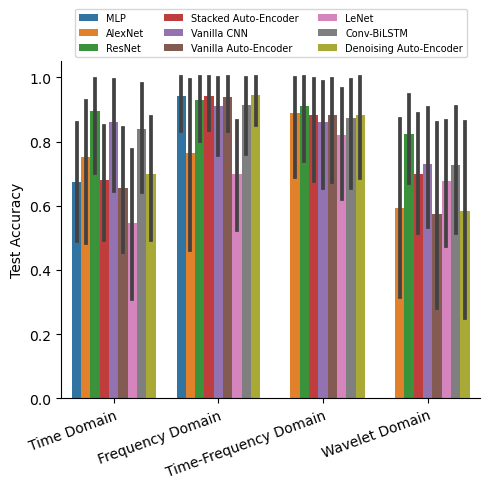

In [33]:
plt.figure(figsize=(6, 4.5))
catplot = sns.catplot(x='Input type', y='Test Accuracy', 
            hue="Model", 
            # col="Dataset", 
            order=["Time Domain", 
                    "Frequency Domain",
                    "Time-Frequency Domain",
                    "Wavelet Domain"], 
            data=df, kind='bar', legend=False)
catplot.tick_params(axis='x', rotation=0)
catplot.set_xlabels("")
# catplot.fig.set_size_inches(11.69, 8.27)
# sns.move_legend(catplot, "upper left", bbox_to_anchor=(.71, 0.999), ncol=1, title=None, frameon=False)
plt.legend(bbox_to_anchor=(0.5, 1.0), loc='lower center', ncol=3, fontsize=7)
plt.xticks(rotation=20, ha="right", rotation_mode='anchor')
plt.tight_layout()
plt.savefig("pic/InputType_vs_Model.svg")

<Figure size 600x450 with 0 Axes>

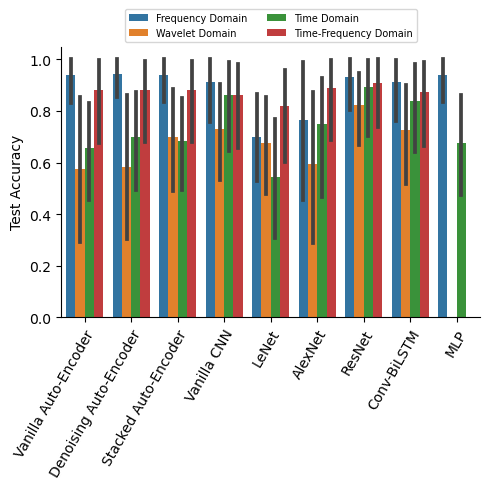

In [40]:
plt.figure(figsize=(6, 4.5))
catplot = sns.catplot(x='Model', y='Test Accuracy', 
            hue="Input type", 
            # col="Dataset", 
            order=["Vanilla Auto-Encoder", 
                    "Denoising Auto-Encoder",
                    "Stacked Auto-Encoder",
                    "Vanilla CNN",
                    "LeNet",
                    "AlexNet",
                    "ResNet",
                    "Conv-BiLSTM",
                    "MLP"], data=df, kind='bar', legend=False)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax = catplot.axes
catplot.tick_params(axis='x', rotation=-30)
catplot.set_xlabels("")
# catplot.legend.set_visible(True)
# sns.move_legend(catplot, "lower center", bbox_to_anchor=(.5, 0.95), ncol=5, title=None, frameon=False)
plt.legend(bbox_to_anchor=(0.5, 1.00), loc='lower center', ncol=2, fontsize=7)
# catplot.fig.set_size_inches(11.69, 8.27)
# for i in range(3):
#     ax[0, i].legend(frameon=False, ncol=5, loc='best')
plt.xticks(rotation=60, ha="right", rotation_mode='anchor')
plt.tight_layout()
plt.savefig("pic/Model_vs_InputType.svg")

<Figure size 600x450 with 0 Axes>

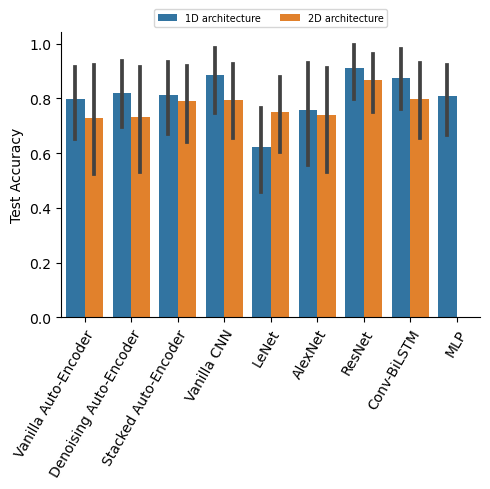

In [41]:
plt.figure(figsize=(6, 4.5))
catplot = sns.catplot(x='Model', y='Test Accuracy', 
            hue="Model dim", 
            # col="Dataset", 
            order=["Vanilla Auto-Encoder", 
                    "Denoising Auto-Encoder",
                    "Stacked Auto-Encoder",
                    "Vanilla CNN",
                    "LeNet",
                    "AlexNet",
                    "ResNet",
                    "Conv-BiLSTM",
                    "MLP"], data=df, kind='bar', legend=False)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax = catplot.axes
# catplot.tick_params(axis='x', rotation=-30)
catplot.set_xlabels("")
plt.legend(bbox_to_anchor=(0.5, 1.0), loc='lower center', ncol=2, fontsize=7)
# catplot.legend.set_visible(True)
# sns.move_legend(catplot, "lower center", bbox_to_anchor=(.5, 0.95), ncol=5, title=None, frameon=False)
# catplot.fig.set_size_inches(11.69, 8.27)
# for i in range(3):
#     ax[0, i].legend(frameon=False, ncol=5, loc='best')
plt.xticks(rotation=60, ha="right", rotation_mode='anchor')
plt.tight_layout()
plt.savefig("pic/Model_vs_architecture.svg")

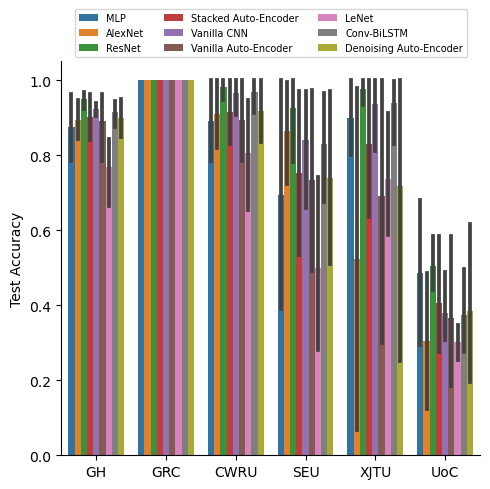

In [16]:
catplot = sns.catplot(x='Dataset', y='Test Accuracy', 
            hue="Model", 
            # col="Dataset", 
            order=["GH", "GRC", "CWRU", "SEU", "XJTU", "UoC"],
            data=df, kind='bar', legend=False)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax = catplot.axes
catplot.tick_params(axis='x', rotation=0)
catplot.set_xlabels("")
plt.legend(bbox_to_anchor=(0.5, 1.0), loc='lower center', ncol=3, fontsize=7)
# catplot.legend.set_visible(True)
# sns.move_legend(catplot, "lower left", bbox_to_anchor=(.7, 0.68), ncol=1, title=None, frameon=False)

# catplot.fig.set_size_inches(11.69, 8.27)
# for i in range(3):
#     ax[0, i].legend(frameon=False, ncol=5, loc='best')
plt.tight_layout()
plt.savefig("pic/Dataset_vs_model.svg")

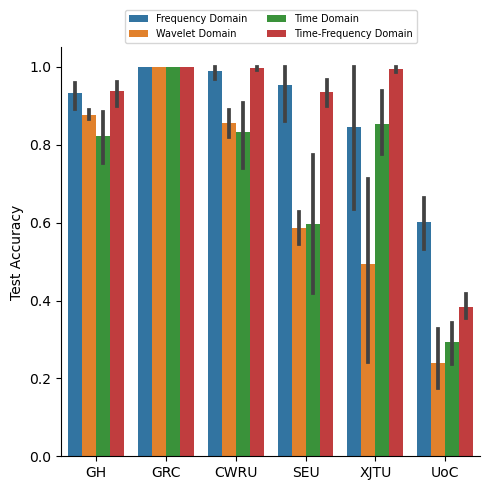

In [17]:
catplot = sns.catplot(x='Dataset', y='Test Accuracy', 
            hue="Input type", 
            # col="Dataset", 
            order=["GH", "GRC", "CWRU", "SEU", "XJTU", "UoC"],
            data=df, kind='bar', legend=False)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax = catplot.axes
catplot.tick_params(axis='x', rotation=0)
catplot.set_xlabels("")
plt.legend(bbox_to_anchor=(0.5, 1.0), loc='lower center', ncol=2, fontsize=7)
# catplot.legend.set_visible(True)
# sns.move_legend(catplot, "center", bbox_to_anchor=(.9, 0.9), ncol=1, title=None, frameon=False)
# catplot.fig.set_size_inches(11.69, 8.27)
# for i in range(3):
#     ax[0, i].legend(frameon=False, ncol=5, loc='best')
plt.tight_layout()
plt.savefig("pic/Dataset_vs_InputType.svg")

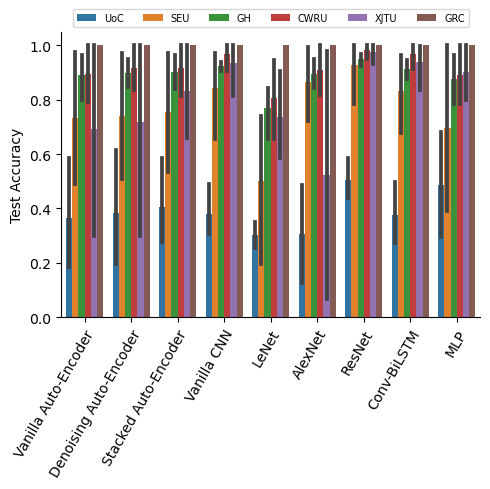

In [42]:
catplot = sns.catplot(x='Model', y='Test Accuracy', 
            hue="Dataset", 
            # col="Dataset", 
            order=["Vanilla Auto-Encoder", 
                    "Denoising Auto-Encoder",
                    "Stacked Auto-Encoder",
                    "Vanilla CNN",
                    "LeNet",
                    "AlexNet",
                    "ResNet",
                    "Conv-BiLSTM",
                    "MLP"], data=df, kind='bar', legend=False)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax = catplot.axes
# catplot.tick_params(axis='x', rotation=-30)
catplot.set_xlabels("")
plt.legend(bbox_to_anchor=(0.5, 1.), loc='lower center', ncol=6, fontsize=7)
# catplot.legend.set_visible(True)
# sns.move_legend(catplot, "lower center", bbox_to_anchor=(.5, 0.95), ncol=5, title=None, frameon=False)
# catplot.fig.set_size_inches(11.69, 8.27)
# for i in range(3):
#     ax[0, i].legend(frameon=False, ncol=5, loc='best')
plt.xticks(rotation=60, ha="right", rotation_mode='anchor')
plt.tight_layout()
plt.savefig("pic/Model_vs_Dataset.svg")

# 补充数据集数量

In [348]:
df.loc[(df['Dataset'] == "SEU") & (df['Model dim'] == "1D architecture"), 'Train Dataset Size'] = 1640
df.loc[(df['Dataset'] == "SEU") & (df['Model dim'] == "1D architecture"), 'Val Dataset Size'] = 410
df.loc[(df['Dataset'] == "SEU") & (df['Model dim'] == "2D architecture"), 'Train Dataset Size'] = 1640
df.loc[(df['Dataset'] == "SEU") & (df['Model dim'] == "2D architecture"), 'Val Dataset Size'] = 410

df.loc[(df['Dataset'] == "XJTU") & (df['Model dim'] == "1D architecture"), 'Train Dataset Size'] = 1545
df.loc[(df['Dataset'] == "XJTU") & (df['Model dim'] == "1D architecture"), 'Val Dataset Size'] = 390
df.loc[(df['Dataset'] == "XJTU") & (df['Model dim'] == "2D architecture"), 'Train Dataset Size'] = 1545
df.loc[(df['Dataset'] == "XJTU") & (df['Model dim'] == "2D architecture"), 'Val Dataset Size'] = 390

df.loc[(df['Dataset'] == "UoC") & (df['Model dim'] == "1D architecture"), 'Train Dataset Size'] = 2637
df.loc[(df['Dataset'] == "UoC") & (df['Model dim'] == "1D architecture"), 'Val Dataset Size'] = 657
df.loc[(df['Dataset'] == "UoC") & (df['Model dim'] == "2D architecture"), 'Train Dataset Size'] = 2637
df.loc[(df['Dataset'] == "UoC") & (df['Model dim'] == "2D architecture"), 'Val Dataset Size'] = 657

In [349]:
df.to_csv("result_2.csv", index=False)

In [354]:
df_agg = df.groupby(['Dataset']).agg({
    'Train Dataset Size': 'mean',
    'Test Accuracy': ['mean', 'std']
})
# 合并多层索引的列名
df_agg.columns = [' '.join(col).strip() for col in df_agg.columns.values]
# 重置索引
df_agg = df_agg.reset_index()

df_agg.sort_values('Train Dataset Size mean', ascending=False, inplace=True)
df_agg

,Dataset,Train Dataset Size mean,Test Accuracy mean,Test Accuracy std
4,UoC,2637.000000,0.383894,0.168437
1,GH,2039.882353,0.892009,0.080622
2,GRC,1984.352941,1.000000,0.000000
3,SEU,1640.000000,0.768721,0.243403
5,XJTU,1545.000000,0.800079,0.302711
0,CWRU,1055.705882,0.918282,0.107138


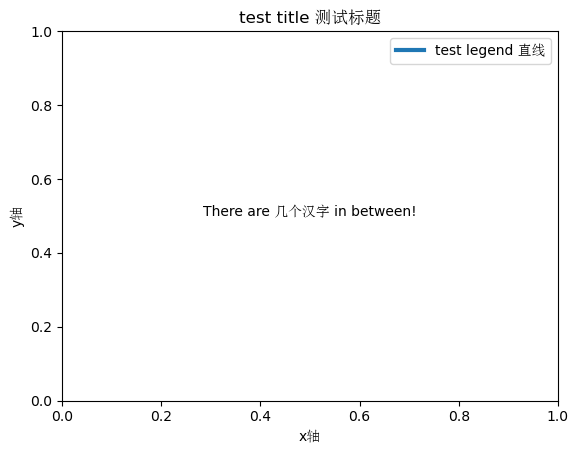

In [26]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.font_manager import FontProperties

font = FontProperties()
font.set_family(['DejaVu Sans', 'SimSun'])



fig, ax = plt.subplots()
ax.text(
    .5, .5, "There are 几个汉字 in between!",
    family=['DejaVu Sans', 'SimSun'],
    ha='center'
)
l1 = Line2D([0], [0], lw=3)
ax.set_title("test title 测试标题", family=['DejaVu Sans', 'SimSun'])
ax.set_xlabel("x轴", family=['DejaVu Sans', 'SimSun'])
ax.set_ylabel("y轴", family=['DejaVu Sans', 'SimSun'])
plt.legend([l1], ['test legend 直线'], prop=font)

In [3]:
from matplotlib.font_manager import FontManager
import subprocess

fm = FontManager()
mat_fonts = set(f.name for f in fm.ttflist)

output = subprocess.check_output(
    'fc-list :lang=zh -f "%{family}\n"', shell=True)
output = output.decode('utf-8')
zh_fonts = set(f.split(',', 1)[0] for f in output.split('\n'))
available = mat_fonts & zh_fonts

print('*' * 10, '可用的字体', '*' * 10)
for f in available:
    print(f)

********** 可用的字体 **********
Yahei Mono
Microsoft YaHei
SimHei
YouYuan
YaHei Consolas Hybrid
Noto Serif CJK JP
Noto Sans CJK JP
FangSong
KaiTi
SimSun
Droid Sans Fallback
LiSu


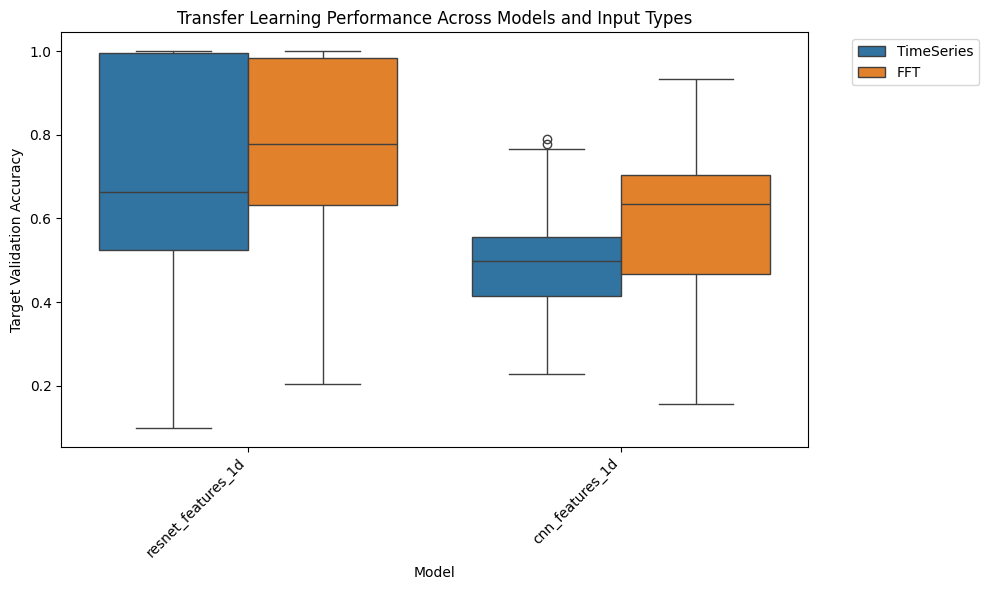

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='model_name', y='target_val-Acc', hue='Input type')
plt.xticks(rotation=45, ha='right')
plt.title('Transfer Learning Performance Across Models and Input Types')
plt.xlabel('Model')
plt.ylabel('Target Validation Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('transfer_learning_performance.png', bbox_inches='tight')


Performance Summary for XJTU Dataset:
                                                      mean     std
is_apply_multi_label model_name         Input type                
0.0                  cnn_features_1d    FFT         0.4254  0.1250
                                        TimeSeries  0.4922  0.0940
                     resnet_features_1d FFT         0.3837  0.1501
                                        TimeSeries  0.5425  0.1244
1.0                  cnn_features_1d    FFT         0.4103  0.1543
                                        TimeSeries  0.5321  0.1463
                     resnet_features_1d FFT         0.4653  0.0970
                                        TimeSeries  0.4844  0.1269


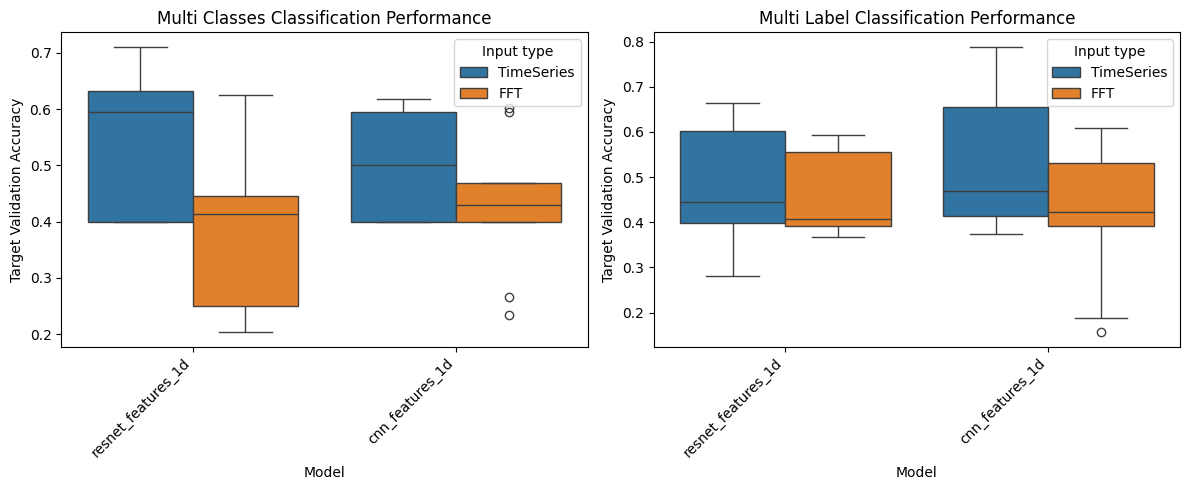

In [5]:
# Filter XJTU dataset
xjtu_df = df[df['data_name'] == 'XJTU'].copy()

# Create separate plots for different classifier types
plt.figure(figsize=(12, 5))

# Plot Multi Classes (is_apply_multi_label=0)
plt.subplot(1, 2, 1)
sns.boxplot(data=xjtu_df[xjtu_df['is_apply_multi_label']==0], 
            x='model_name', y='target_val-Acc', 
            hue='Input type')
plt.title('Multi Classes Classification Performance')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('Target Validation Accuracy')

# Plot Multi Label (is_apply_multi_label=1)
plt.subplot(1, 2, 2)
sns.boxplot(data=xjtu_df[xjtu_df['is_apply_multi_label']==1], 
            x='model_name', y='target_val-Acc', 
            hue='Input type')
plt.title('Multi Label Classification Performance')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('Target Validation Accuracy')

plt.tight_layout()
plt.savefig('xjtu_classification_comparison.svg', bbox_inches='tight')

# Print summary statistics
print("\nPerformance Summary for XJTU Dataset:")
summary = xjtu_df.groupby(['is_apply_multi_label', 'model_name', 'Input type'])['target_val-Acc'].agg(['mean', 'std']).round(4)
print(summary)

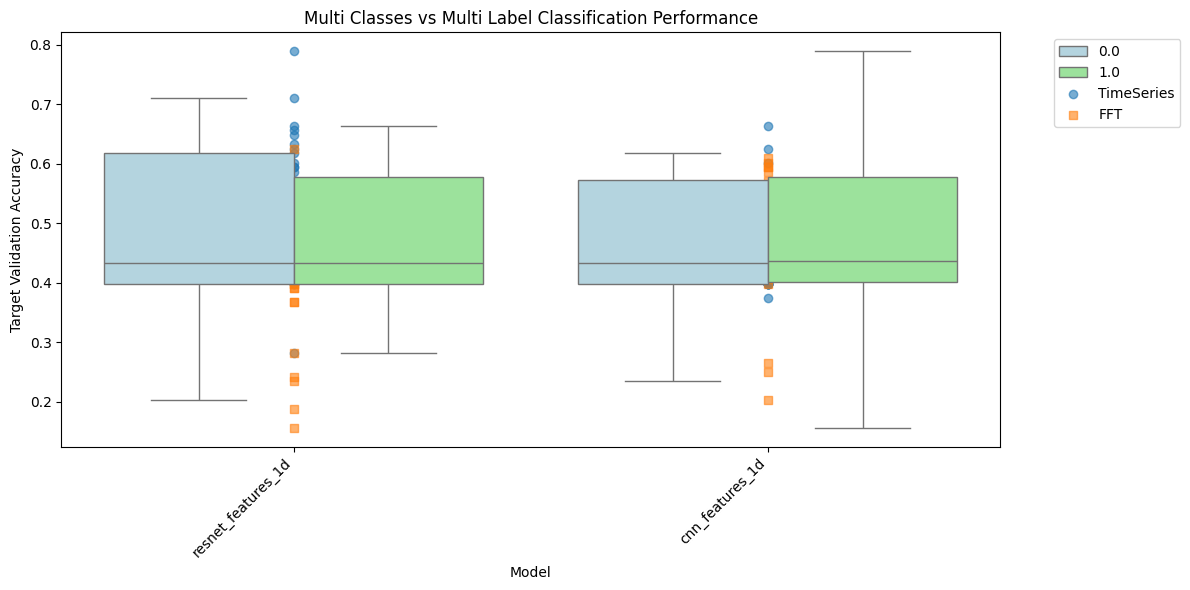

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=xjtu_df, 
            x='model_name', 
            y='target_val-Acc', 
            hue='is_apply_multi_label', 
            palette=['lightblue', 'lightgreen'],
            hue_order=[0.0, 1.0])

plt.title('Multi Classes vs Multi Label Classification Performance')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('Target Validation Accuracy')
plt.legend(title='Classification Type',
          labels=['Multi Classes', 'Multi Label'])

# Add Input type information using different markers
for i, input_type in enumerate(['TimeSeries', 'FFT']):
    data = xjtu_df[xjtu_df['Input type'] == input_type]
    plt.scatter(data.index.map(lambda x: x % 2), 
               data['target_val-Acc'],
               marker=['o', 's'][i],
               label=input_type,
               alpha=0.6)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('xjtu_classification_comparison_combined.svg', bbox_inches='tight')

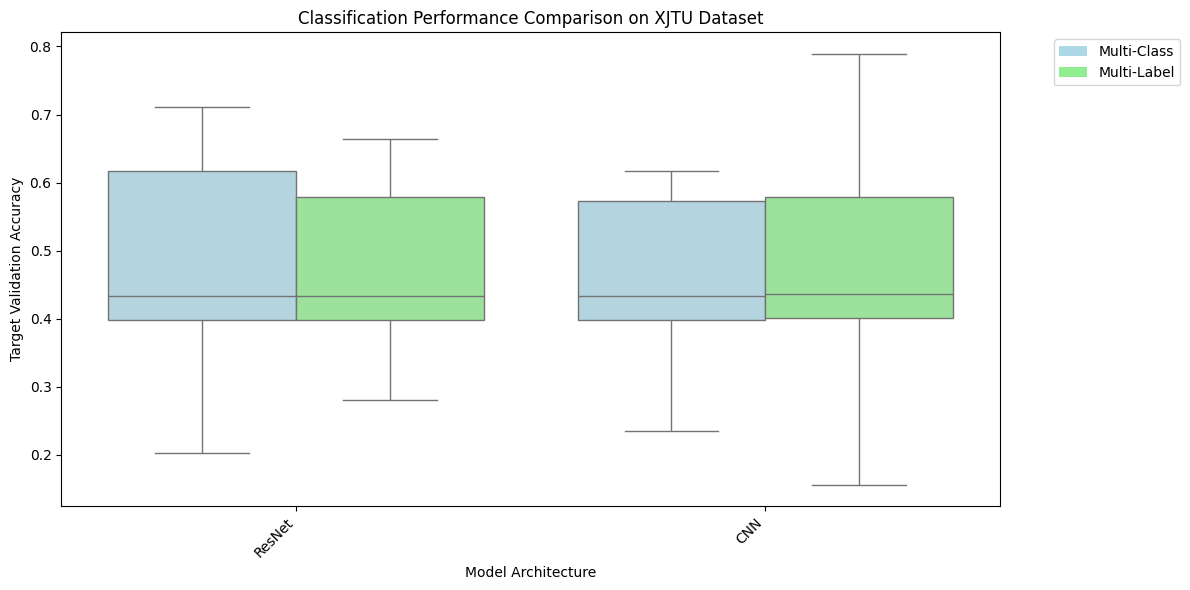

In [7]:
from matplotlib.patches import Patch

plt.figure(figsize=(12, 6))

# Create a copy of the dataframe and map model names
xjtu_df_plot = xjtu_df.copy()
xjtu_df_plot['model_name'] = xjtu_df_plot['model_name'].map({
    'resnet_features_1d': 'ResNet',
    'cnn_features_1d': 'CNN'
})

# Create boxplot with custom hue order and labels
sns.boxplot(data=xjtu_df_plot, 
            x='model_name', 
            y='target_val-Acc', 
            hue='is_apply_multi_label',
            hue_order=[0.0, 1.0],
            palette=['lightblue', 'lightgreen'])

plt.title('Classification Performance Comparison on XJTU Dataset', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model Architecture')
plt.ylabel('Target Validation Accuracy')

# Remove the original legend
plt.gca().get_legend().remove()

# Create custom legend with only classification types
legend_elements = [
    Patch(facecolor='lightblue', label='Multi-Class'),
    Patch(facecolor='lightgreen', label='Multi-Label')
]

plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('xjtu_classification_comparison.svg', bbox_inches='tight')


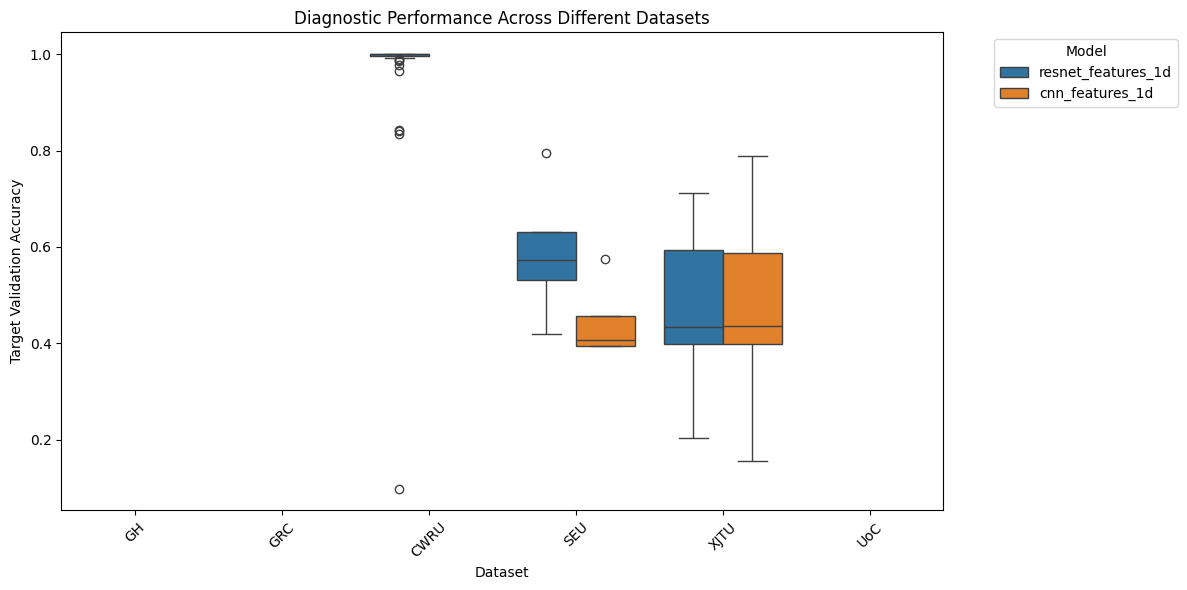

In [9]:
plt.figure(figsize=(12, 6))

# Create grouped boxplot
sns.boxplot(data=df, 
            x='data_name', 
            y='target_val-Acc',
            hue='model_name',
            order=["GH", "GRC", "CWRU", "SEU", "XJTU", "UoC"])

plt.title('Diagnostic Performance Across Different Datasets', fontsize=12)
plt.xlabel('Dataset')
plt.ylabel('Target Validation Accuracy')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust legend
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the figure
plt.savefig('dataset_comparison.svg', bbox_inches='tight')


Summary Statistics:
                                 mean     std
model_name         Input type                
cnn_features_1d    FFT         0.5924  0.1735
                   TimeSeries  0.4952  0.1138
resnet_features_1d FFT         0.7688  0.2133
                   TimeSeries  0.7066  0.2274


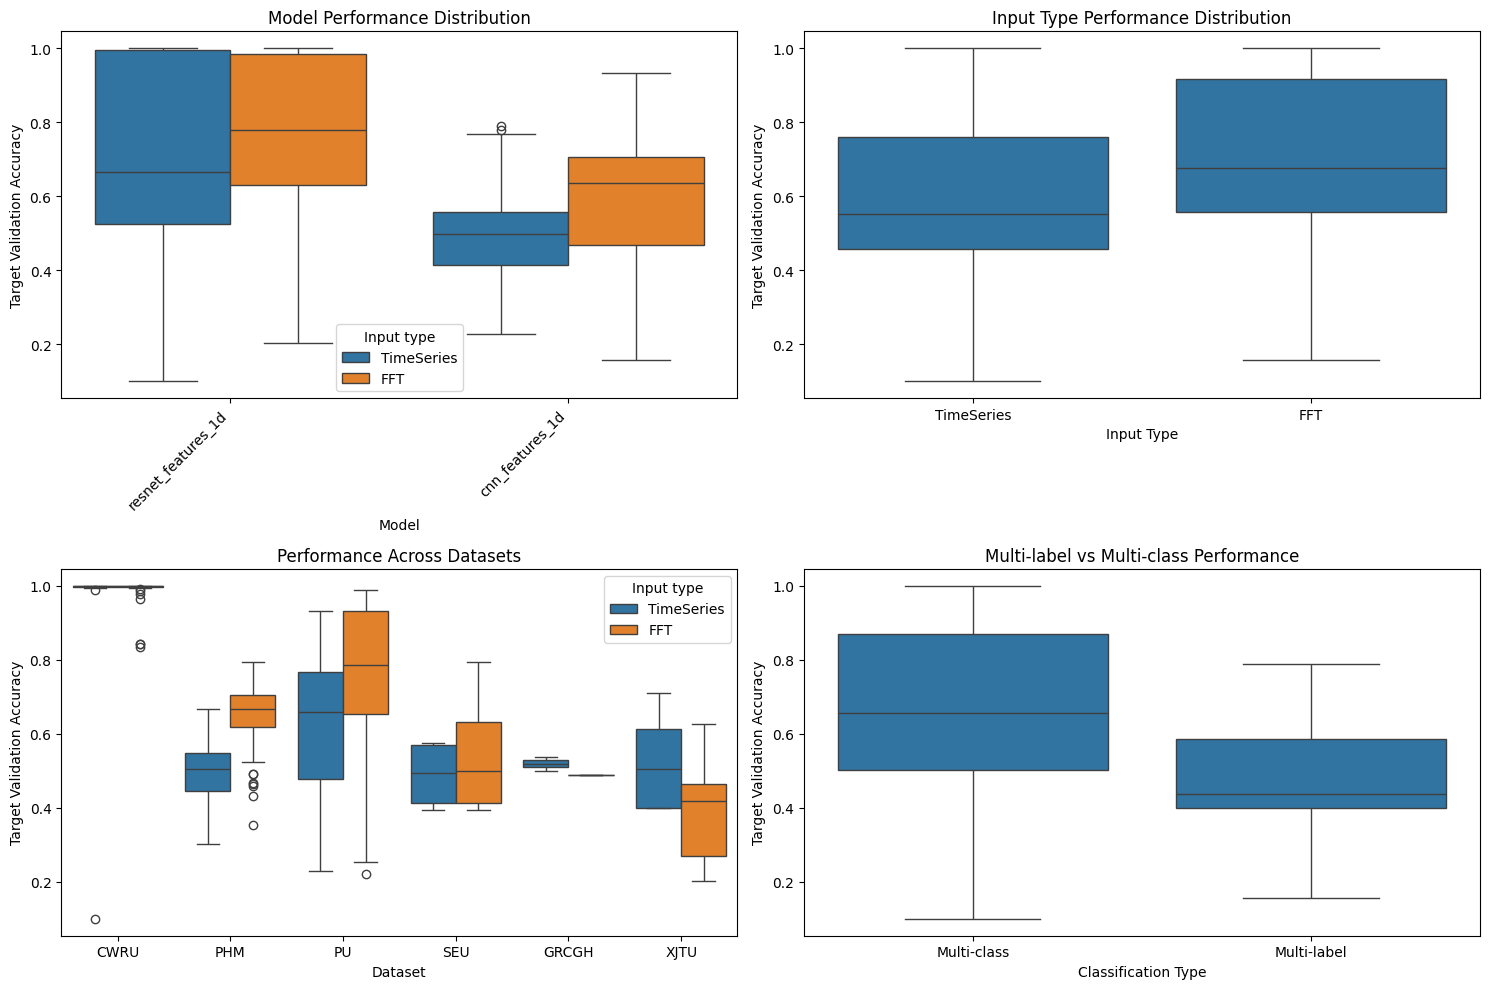

In [27]:
fig = plt.figure(figsize=(15, 10))

# 1. Performance comparison across different models
plt.subplot(2, 2, 1)
# sns.boxplot(data=df, x='model_name', y='target_val-Acc')
sns.boxplot(data=df, x='model_name', y='target_val-Acc', hue='Input type')
plt.xticks(rotation=45, ha='right')
plt.title('Model Performance Distribution')
plt.xlabel('Model')
plt.ylabel('Target Validation Accuracy')

# 2. Performance comparison across different input types
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Input type', y='target_val-Acc')
plt.title('Input Type Performance Distribution')
plt.xlabel('Input Type')
plt.ylabel('Target Validation Accuracy')

# 3. Dataset comparison
plt.subplot(2, 2, 3)
df_plot = df.loc[df.loc[:, "is_apply_multi_label"] == 0.0, :].copy()
sns.boxplot(data=df_plot, x='data_name', y='target_val-Acc', hue='Input type')
plt.title('Performance Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Target Validation Accuracy')

# 4. Multi-label vs Multi-class comparison
plt.subplot(2, 2, 4)
df_plot = df.copy()
df_plot['Classification Type'] = df_plot['is_apply_multi_label'].map({0.0: 'Multi-class', 1.0: 'Multi-label'})
sns.boxplot(data=df_plot, x='Classification Type', y='target_val-Acc')
plt.title('Multi-label vs Multi-class Performance')
plt.xlabel('Classification Type')
plt.ylabel('Target Validation Accuracy')

plt.tight_layout()
plt.savefig('transfer_learning_analysis.svg', bbox_inches='tight', dpi=300)

# Calculate and print summary statistics
print("\nSummary Statistics:")
summary_stats = df.groupby(['model_name', 'Input type'])['target_val-Acc'].agg(['mean', 'std']).round(4)
print(summary_stats)